In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [17]:
df = pd.read_csv("employee_data.csv")
df.info

<bound method DataFrame.info of     Age    Income  Years_Experience  Job_Satisfaction
0    56  21864.85                 9                 3
1    69  29498.27                 2                 4
2    46  59544.58                 6                 3
3    32  36399.19                27                 1
4    60  57140.64                15                 1
..  ...       ...               ...               ...
95   42  50984.74                 0                 4
96   62  67538.11                 4                 5
97   58  63099.75                27                 1
98   46  53084.75                28                 2
99   32  28347.75                15                 2

[100 rows x 4 columns]>

In [20]:
df = df.drop(columns="Job_Satisfaction")

In [22]:
df.head()

,Age,Income,Years_Experience
0,56,21864.85,9
1,69,29498.27,2
2,46,59544.58,6
3,32,36399.19,27
4,60,57140.64,15


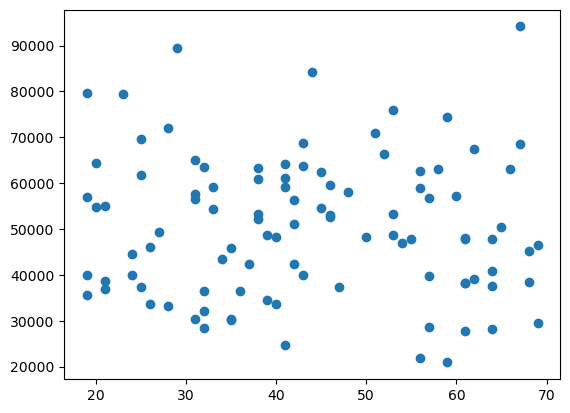

In [24]:
plt.scatter(df.Age, df.Income)

In [26]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [28]:
y_predict = km.fit_predict(df[["Age","Income"]])
y_predict

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

In [30]:
df["cluster"] = y_predict
df.tail()

,Age,Income,Years_Experience,cluster
95,42,50984.74,0,0
96,62,67538.11,4,1
97,58,63099.75,27,1
98,46,53084.75,28,1
99,32,28347.75,15,0


In [32]:
km.cluster_centers_

array([[4.48113208e+01, 3.88371696e+04],
       [4.17021277e+01, 6.38309474e+04]])

Text(0, 0.5, 'Income')

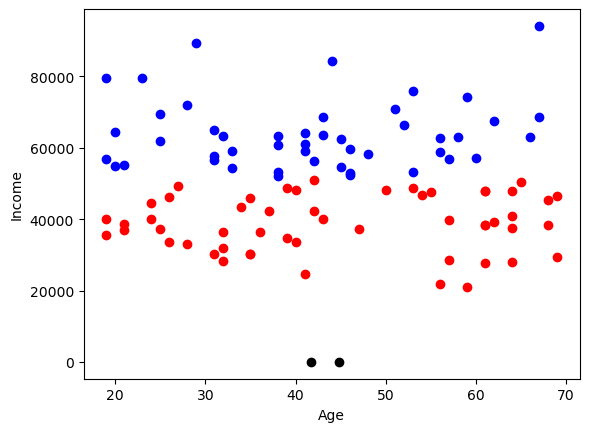

In [34]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1.Age,df1.Income,color="red")
plt.scatter(df2.Age,df2.Income,color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,0],color="black")
plt.xlabel("Age")
plt.ylabel("Income")

In [40]:
scaler = MinMaxScaler()
scaler.fit(df[["Income"]])
df["Income"] = scaler.transform(df[["Income"]])
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])
df

,Age,Income,Years_Experience,cluster
0,0.74,0.013153,9,0
1,1.00,0.117359,2,0
2,0.54,0.527527,6,1
3,0.26,0.211564,27,0
4,0.82,0.494710,15,1
...,...,...,...,...
95,0.46,0.410675,0,0
96,0.86,0.636648,4,1
97,0.78,0.576059,27,1
98,0.54,0.439342,28,1


In [42]:
km = KMeans(n_clusters=2)
y_predict = km.fit_predict(df[["Age","Income"]])
y_predict

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1])

In [44]:
df["cluster"] = y_predict
df

,Age,Income,Years_Experience,cluster
0,0.74,0.013153,9,0
1,1.00,0.117359,2,0
2,0.54,0.527527,6,1
3,0.26,0.211564,27,1
4,0.82,0.494710,15,0
...,...,...,...,...
95,0.46,0.410675,0,1
96,0.86,0.636648,4,0
97,0.78,0.576059,27,0
98,0.54,0.439342,28,1


Text(0, 0.5, 'Income')

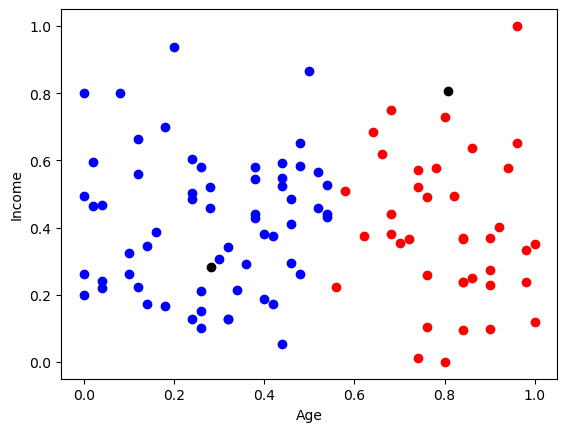

In [46]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1.Age,df1.Income,color="red")
plt.scatter(df2.Age,df2.Income,color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,0],color="black")
plt.xlabel("Age")
plt.ylabel("Income")